<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)





Описание данных:  
 * RowNumber — индекс строки в данных
 * CustomerId — уникальный идентификатор клиента
 * Surname — фамилия
 * CreditScore — кредитный рейтинг
 * Geography — страна проживания
 * Gender — пол
 * Age — возраст
 * Tenure — сколько лет человек является клиентом банка
 * Balance — баланс на счёте
 * NumOfProducts — количество продуктов банка, используемых клиентом
 * HasCrCard — наличие кредитной карты
 * IsActiveMember — активность клиента
 *EstimatedSalary — предполагаемая зарплата

Целевой признак
 * Exited — факт ухода клиента
    
    
 План:
 * Загрузим и подготовим данные. 
 * Исследуем баланс классов, обучим модель без учёта дисбаланса.
 * Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую.
 * Проведём финальное тестирование.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from random import randint
from sklearn.preprocessing import StandardScaler 


## Подготовка данных

In [4]:
try:
    df = pd.read_csv("datasets/Churn.csv")
except:
    df = pd.read_csv("/datasets/Churn.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Посмотрел на пропуски. Природа мне их не ясна. Я предположил бы по CustomerId восстановить. По логике id клиента, последовательно выдают, соотвественно взять у предыдущего по id  клиента , срок сколько он с банком и поставить в пропуск последующего. По сути получатся, когда клиента завели в систему, между соседнеми id  разница в дате будет минимальна.  Где -то  на просторах инернета видел,такой метод=). 
Но у нас так не получится, посмотрел=( у нас такой зависимости нету. Хотя почему не понимаю. Ну вот так, что имееем то имеем.

Попробовать нулем заполнить, тоже сомнительно. У нас есть нулевые. Ну вообщем дальше посмотрим, пока держим в голове. Можно же  и нулем попробовать и медианной.Попробуем с медианной, если не пройдём по условиям F1-меры < 0,59. Другие варианты попробуем

In [7]:
df['Tenure'] = df['Tenure'].fillna(randint(1, 10))

In [8]:
df[df['Tenure'] == 0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


In [9]:
print(df[df['Exited'] == 0].shape)
print(df[df['Exited'] == 1].shape)

(7963, 14)
(2037, 14)


Проверил на сбалансированность.

In [10]:
df.duplicated().sum()

0

Дубликатов нету

По сути фамилия, номер и ид должны быть уникальны. Смысла для нас не имеют эти поля=). Если только Ивановы никогда не уходят из Бета Банка. Пока уберём.

In [11]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
df = pd.get_dummies(df, drop_first=True)

## Исследование задачи

Нужно разбить на выборки. На обучающую, валидационную и тестовую.

In [14]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

print(target_valid[target_valid != 1].shape)
print(target_valid[target_valid != 0].shape)

(996,)
(254,)


In [15]:
target_train

3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
# scaler.fit(features_train[numeric])
#features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым.

Рещающее дерево

In [17]:
best_model_DT = None
best_result = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    valid_predictions = model.predict(features_valid)
    result = f1_score(target_valid, valid_predictions)
    if result > best_result:
        best_model_DT = model
        best_result = result

print("f1_score:", best_result)

f1_score: 0.5797101449275361


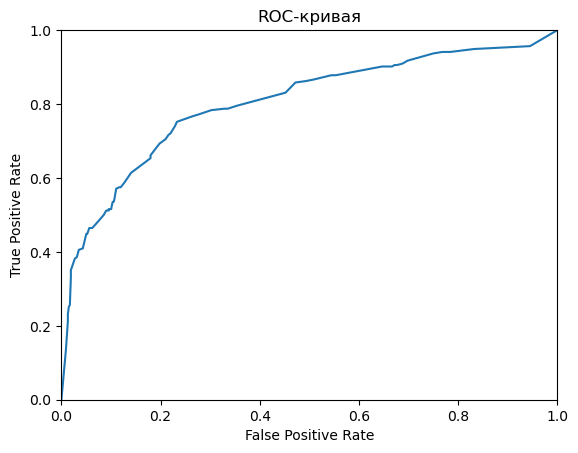

0.8027325838788224


In [18]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,  probabilities_one_valid)
print(auc_roc)

Cлучайный лес

In [ ]:
best_model_rf = None
best_result = 0
for est in range(1, 30):
    for depth in range(1, 20):
        model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        valid_predictions = model.predict(features_valid)
        result = f1_score(target_valid, valid_predictions)
        if result > best_result:
            best_model_rf = model
            best_result = result


print(best_model_rf)
print("f1_score:", best_result)

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,  probabilities_one_valid)
print(auc_roc)

Логическая регрессия

In [ ]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)

print("f1_score:", result)

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,  probabilities_one_valid)
print(auc_roc)

Лучшая модель  на не сбаласированных данных 
RandomForestClassifier(max_depth=18, n_estimators=25, random_state=12345)
f1_score: 0.6004618937644342
auc_roc:  0.7964060968282579


## Борьба с дисбалансом

Увеличение выборки

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4)

model = RandomForestClassifier(
    max_depth=9, n_estimators=16, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [ ]:
best_model_rf = None
best_result = 0
for est in range(1, 30):
    for depth in range(1, 20):
        model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_upsampled, target_upsampled)
        valid_predictions = model.predict(features_valid)
        result = f1_score(target_valid, valid_predictions)
        if result > best_result:
            best_model_rf = model
            best_result = result


print(best_model_rf)
print("f1_score:", best_result)

Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5)

model = RandomForestClassifier(
    max_depth=9, n_estimators=25, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Взвешивание классов

In [ ]:
model = RandomForestClassifier(
    max_depth=9, n_estimators=21, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Итого: лучшая модель  Cлучайный лес.
на результат особо не повлияла борьба с дисбалансом. чутка повышает f1_score upsample увелечение выборки Х10. Тут если честно я не очень понял, почему при class_weight='balanced' на валидационной, снижалась метрика, 
ниже на тестовой выборке наоборот.
Читал статью 
https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/
из неё вывод сделал, что class_weight='balanced' желательно выполнять.

## Тестирование модели

In [ ]:
model = RandomForestClassifier(
    max_depth=10, n_estimators=26, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_valid))

In [ ]:
dummy = DummyClassifier(strategy='most_frequent').fit(
    features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)


print("F1:", f1_score(target_test, dummy_pred))

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test,  probabilities_one_valid)
print(auc_roc)

В результате работы были проанализированы модели для задачи. Выявлены лучшие параметры для модели, которая сможет проанализировать поведение клиентов и предсказать расторжение догора с банком
лучшая модель это RandomForestClassifier(max_depth=11, n_estimators=29)